<a href="https://colab.research.google.com/github/Sudhaganisrinidhi/B_20_1342/blob/main/random_forest(heart_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

name:srinidhi
htno:2303A51342
batch:20

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.99
Precision: 1.00
F1-Score: 0.99



Confusion Matrix:
[[102   0]
 [  3 100]]


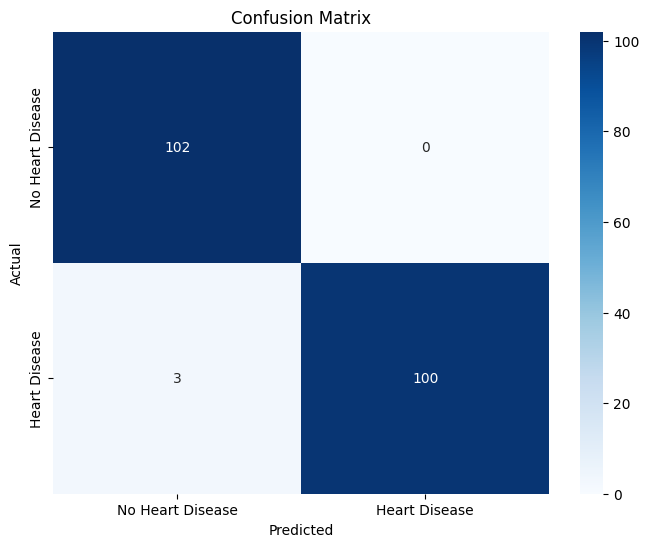

In [7]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("\nConfusion Matrix:")
print(conf_matrix)

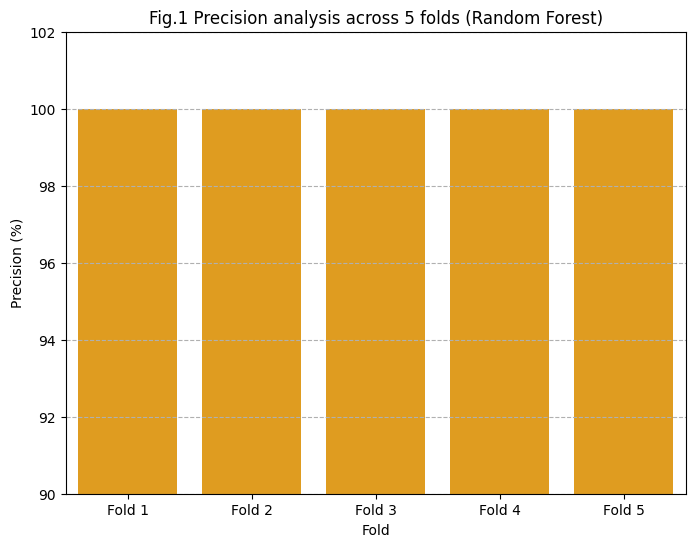

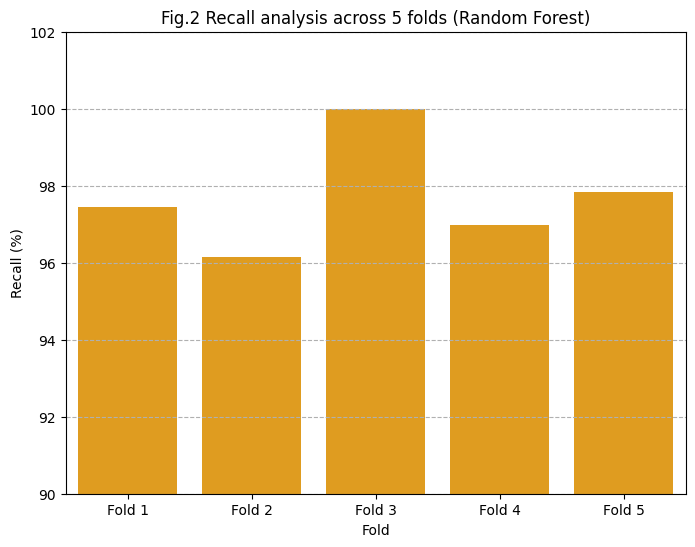

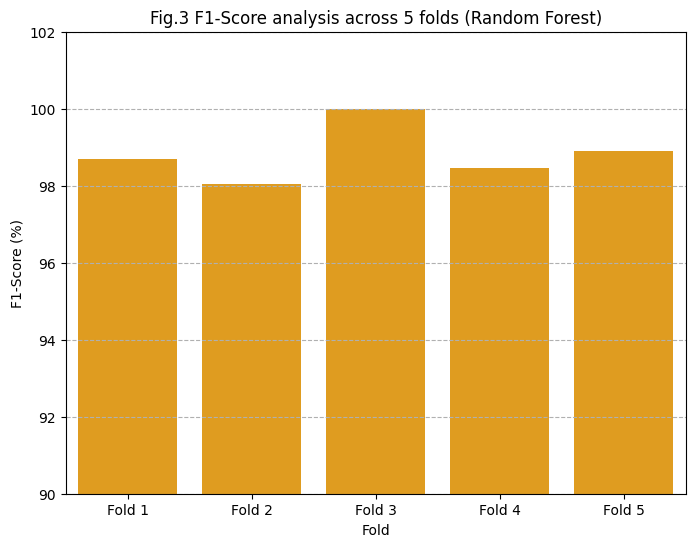

Charts for Precision, Recall, and F1-Score have been generated and saved.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
    'Recall (%)': [97.44, 96.15, 100.00, 96.97, 97.83],
    'Precision (%)': [100.00, 100.00, 100.00, 100.00, 100.00],
    'F1-Score (%)': [98.70, 98.04, 100.00, 98.46, 98.90]
}
df_performance = pd.DataFrame(data)
def plot_metric(df, metric_col, title, filename):
    """Generates and saves a bar chart for a single performance metric."""
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Fold', y=metric_col, data=df, color='orange')
    plt.ylim(90, 102)
    plt.ylabel(metric_col)
    plt.title(title)

    plt.grid(axis='y', linestyle='--')
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Fig. 1: Precision analysis across 5 folds
plot_metric(
    df_performance,
    'Precision (%)',
    'Fig.1 Precision analysis across 5 folds (Random Forest)',
    'Fig1_Precision_Analysis.png'
)

# Fig. 2: Recall analysis across 5 folds
plot_metric(
    df_performance,
    'Recall (%)',
    'Fig.2 Recall analysis across 5 folds (Random Forest)',
    'Fig2_Recall_Analysis.png'
)

# Fig. 3: F1-Score analysis across 5 folds
plot_metric(
    df_performance,
    'F1-Score (%)',
    'Fig.3 F1-Score analysis across 5 folds (Random Forest)',
    'Fig3_F1_Score_Analysis.png'
)

print("Charts for Precision, Recall, and F1-Score have been generated and saved.")

In [9]:
# Create new patient data for prediction
new_patient_data = {
    'age': 55,
    'sex': 1,
    'cp': 2,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

# Create a DataFrame for the new patient
new_patient_df = pd.DataFrame([new_patient_data])

# Make a prediction on the new patient data
new_patient_prediction = model.predict(new_patient_df)
prediction_label = 'Heart Disease' if new_patient_prediction[0] == 1 else 'No Heart Disease'
new_patient_df['Prediction'] = [prediction_label]

# Print the new patient's data and the final prediction
print("New Patient Data:")
print(new_patient_df)
print(f"\nPrediction for the new patient: {prediction_label}")

# Save the new patient data with prediction to a CSV file
new_patient_df.to_csv('new_patient_prediction.csv', index=False)

New Patient Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   55    1   2       130   250    0        1      150      0      1.0      2   

   ca  thal     Prediction  
0   0     2  Heart Disease  

Prediction for the new patient: Heart Disease
